In [ ]:
## self-attempt on autoencoders using the fashion dataset

An autoencoder is actually an Artificial Neural Network that is used to decompress and compress the input data provided in an unsupervised manner. Decompression and compression operations are lossy and data-specific.

Lossy operations mean that the reconstructed image is often not an as sharp or high resolution in quality as the original one and the difference is greater for reconstructions with a greater loss and this is known as a lossy operation. The following image shows how the image is encoded and decoded with a certain loss factor.

The Autoencoder is a particular type of feed-forward neural network and the input should be similar to the output. Hence we would need an encoding method, loss function, and a decoding method. The end goal is to perfectly replicate the input with minimum loss.

In [2]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras import Input, Model, Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# from tensorflow.keras.datasets import mnist

In [4]:
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# print(x_train.shape)
# print(x_test.shape)

In [5]:
# type(x_train)

In [6]:
# x_train[0].shape

In [7]:
# plt.imshow(x_train[1])

#### Ingest Training Data

In [8]:
fashion_train = pd.read_csv('../../../Large_Datasets/fashion-mnist_train.csv')
fashion_train.iloc[:5, :5]

,label,pixel1,pixel2,pixel3,pixel4
0,2,0,0,0,0
1,9,0,0,0,0
2,6,0,0,0,0
3,0,0,0,0,1
4,3,0,0,0,0


In [9]:
x_train = fashion_train.iloc[:, 1:].to_numpy()
y_train = fashion_train.iloc[:, 0]

x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

print(x_train.shape, y_train.shape)

(60000, 784) (60000,)


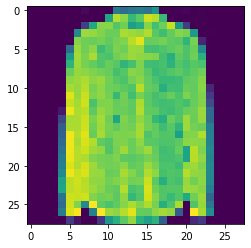

In [10]:
plt.imshow(x_train[2].reshape(28, 28))

#### Ingest Test Data

In [11]:
fashion_test = pd.read_csv('../../../Large_Datasets/fashion-mnist_test.csv')
fashion_test.iloc[:5, :5]

,label,pixel1,pixel2,pixel3,pixel4
0,0,0,0,0,0
1,1,0,0,0,0
2,2,0,0,0,0
3,2,0,0,0,0
4,3,0,0,0,0


In [12]:
x_test = fashion_test.iloc[:, 1:].to_numpy()
y_test = fashion_test.iloc[:, 0]

x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_test.shape, y_test.shape)

(10000, 784) (10000,)


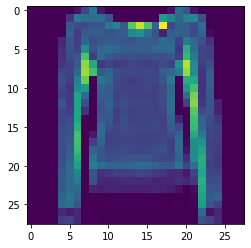

In [13]:
plt.imshow(x_test[2].reshape(28, 28))

#### Simple Autoencoder

In [14]:
encoding_dim = 15 
input_img = Input(shape=(784,))
# encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded representation of code 
decoded = Dense(784, activation='sigmoid')(encoded)
# Model which take input image and shows decoded images
autoencoder = Model(input_img, decoded)

In [15]:
# This model shows encoded images
encoder = Model(input_img, encoded)
# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))
# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [16]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [17]:
autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                validation_data=(x_test, x_test))

Epoch 1/15
235/235 [==============================] - 2s 5ms/step - loss: 0.4377 - val_loss: 0.3608
Epoch 2/15
235/235 [==============================] - 1s 5ms/step - loss: 0.3453 - val_loss: 0.3317
Epoch 3/15
235/235 [==============================] - 1s 5ms/step - loss: 0.3257 - val_loss: 0.3202
Epoch 4/15
235/235 [==============================] - 1s 5ms/step - loss: 0.3167 - val_loss: 0.3126
Epoch 5/15
235/235 [==============================] - 1s 5ms/step - loss: 0.3109 - val_loss: 0.3079
Epoch 6/15
235/235 [==============================] - 1s 5ms/step - loss: 0.3071 - val_loss: 0.3049
Epoch 7/15
235/235 [==============================] - 1s 5ms/step - loss: 0.3047 - val_loss: 0.3029
Epoch 8/15
235/235 [==============================] - 1s 5ms/step - loss: 0.3032 - val_loss: 0.3017
Epoch 9/15
235/235 [==============================] - 1s 5ms/step - loss: 0.3023 - val_loss: 0.3009
Epoch 10/15
235/235 [==============================] - 1s 5ms/step - loss: 0.3016 - val_loss: 0.3003

In [20]:
for i in range(5):
    print(i)

0
1
2
3
4


In [21]:
for i in range(5, 10):
    print(i)

5
6
7
8
9


313/313 [==============================] - 0s 1ms/step


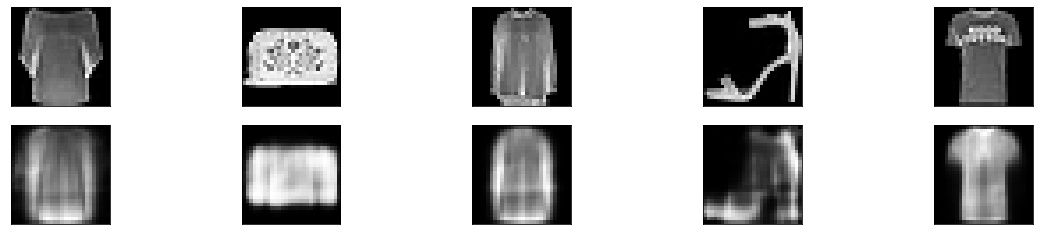

In [43]:
## implement enumerate for more flexibility
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)
plt.figure(figsize=(20, 4))
for i, v in enumerate(range(5, 10)):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[v].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img[v].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### Deep CNN Autoencoder

In [30]:
deep_model = Sequential()
# encoder network
deep_model.add(Conv2D(30, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
deep_model.add(MaxPooling2D(2, padding= 'same'))
deep_model.add(Conv2D(15, 3, activation= 'relu', padding='same'))
deep_model.add(MaxPooling2D(2, padding= 'same'))
#decoder network
deep_model.add(Conv2D(15, 3, activation= 'relu', padding='same'))
deep_model.add(UpSampling2D(2))
deep_model.add(Conv2D(30, 3, activation= 'relu', padding='same'))
deep_model.add(UpSampling2D(2))
deep_model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output layer
deep_model.compile(optimizer= 'adam', loss = 'binary_crossentropy')
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 30)        300       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 30)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 15)        4065      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 15)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 15)          2040      
                                                                 
 up_sampling2d_2 (UpSampling  (None, 14, 14, 15)      

In [31]:
## note that data format is different for deep cnn
x_train_deep = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test_deep = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [32]:
deep_model.fit(x_train_deep, x_train_deep,
                epochs=15,
                batch_size=128,
                validation_data=(x_test_deep, x_test_deep))

Epoch 1/15
469/469 [==============================] - 55s 116ms/step - loss: 0.3152 - val_loss: 0.2810
Epoch 2/15
469/469 [==============================] - 60s 129ms/step - loss: 0.2786 - val_loss: 0.2741
Epoch 3/15
469/469 [==============================] - 63s 134ms/step - loss: 0.2738 - val_loss: 0.2706
Epoch 4/15
469/469 [==============================] - 61s 130ms/step - loss: 0.2709 - val_loss: 0.2683
Epoch 5/15
469/469 [==============================] - 60s 128ms/step - loss: 0.2689 - val_loss: 0.2664
Epoch 6/15
469/469 [==============================] - 61s 130ms/step - loss: 0.2672 - val_loss: 0.2649
Epoch 7/15
469/469 [==============================] - 66s 141ms/step - loss: 0.2658 - val_loss: 0.2637
Epoch 8/15
469/469 [==============================] - 55s 118ms/step - loss: 0.2645 - val_loss: 0.2634
Epoch 9/15
469/469 [==============================] - 58s 123ms/step - loss: 0.2634 - val_loss: 0.2614
Epoch 10/15
469/469 [==============================] - 65s 138ms/step - l

313/313 [==============================] - 3s 9ms/step


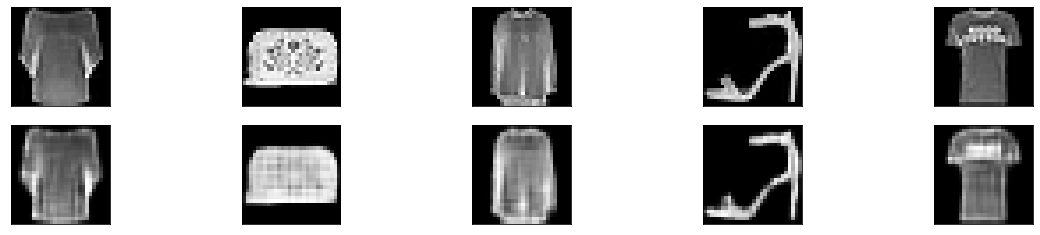

In [44]:
## implement enumerate for more flexibility
pred_deep = deep_model.predict(x_test_deep)
plt.figure(figsize=(20, 4))
for i, v in enumerate(range(5, 10)):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_deep[v].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred_deep[v].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
## pred still takes the image as an input
## noticeable quality improvement of deep cnn versus basic autoencoder